In [6]:
import sys, os
sys.path.append('F:\\python\\ml\\MachineLearning\\src')
import LinearData_1D
import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

# create 1D linear data set

In [7]:
filename1 = 'LinearData_1D_WithNoise_1'
generator = LinearData_1D.Generator1D_WhiteNoise([2.1, 3.4], 100, [0.0, 20.0], 1.0, filename1)
if not os.path.exists('../data/'+filename1+'.csv'):
    generator.generate()

In [8]:
data = pd.read_csv('../data/'+filename1+'.csv')
X = data['X'].values
Y = data['Y'].values
if len(X.shape) == 1:
    N = X.shape[0]
    X = X.reshape((N, 1))

# Use matrix inverse analytic calculation method to regress and plot

In [9]:
# regression results
regressor1 = LinearRegression.LS_Matrix(X, Y, True)
regressor1.regress()
Y1 = regressor1.predict(X)
print(regressor1.coefficient())

[2.09387835 3.42443489]


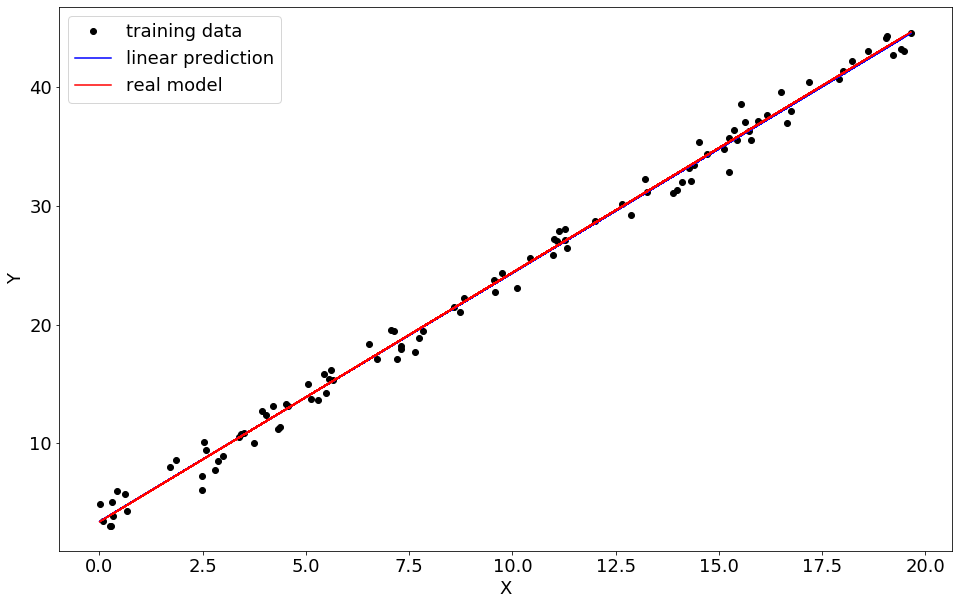

In [10]:
# real underlying model predictions
Y_real = X[:,0] * 2.1 + 3.4# do plot here
plt.figure(num=1, figsize = (16,10))
p1, = plt.plot(X, Y, 'ko')
p2, = plt.plot(X, Y1, 'b-')
p3, = plt.plot(X, Y_real, 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([p1,p2,p3], ['training data', 'linear prediction', 'real model'])

# Use orthogonal decompose method to regress and plot

In [11]:
# regression results
regressor2 = LinearRegression.LS_Ortho(X, Y)
regressor2.regress()
Y2 = regressor2.predict(X)
print(regressor2.coefficient())

[2.09387835 3.42443489]


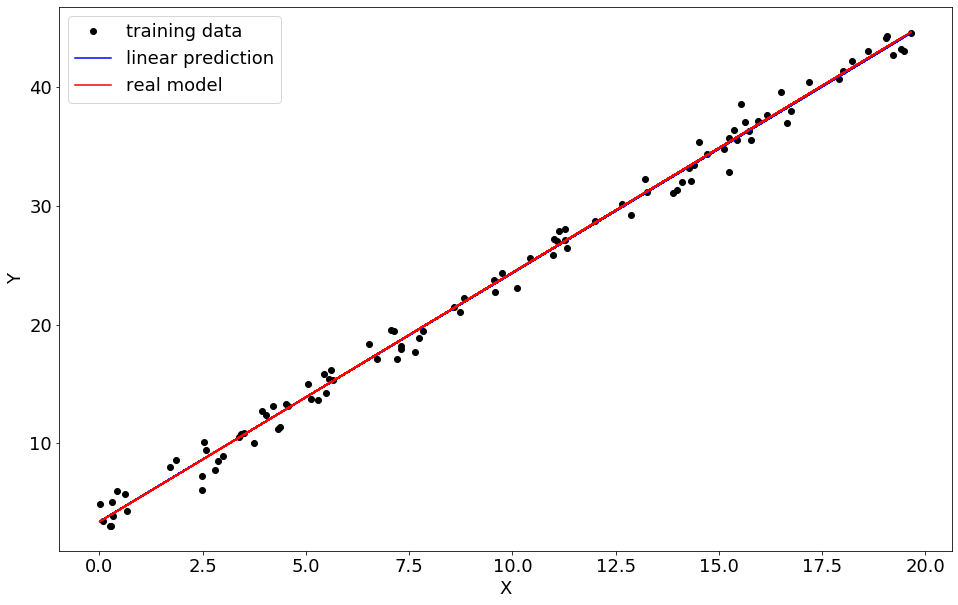

In [12]:
# do plot here
plt.figure(num=2, figsize = (16,10))
p1, = plt.plot(X, Y, 'ko')
p2, = plt.plot(X, Y2, 'b-')
p3, = plt.plot(X, Y_real, 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([p1,p2,p3], ['training data', 'linear prediction', 'real model'])

# Use ridge regression method to regress and plot

In [13]:
# first check if regularization parameter w is 0, we reproduce normal regression results
regressor3 = LinearRegression.LS_Ridge(X, Y, 0.0)
regressor3.regress()
print(regressor3.coefficient())

[2.09387835 3.42443489]


In [14]:
# now add regularization term, it should suppress beta[:-1], in our 1D data case the first coefficient
regressor3 = LinearRegression.LS_Ridge(X, Y, 1)
regressor3.regress()
Y3 = regressor3.predict(X)
print(regressor3.coefficient())

[1.97206706 4.57388843]


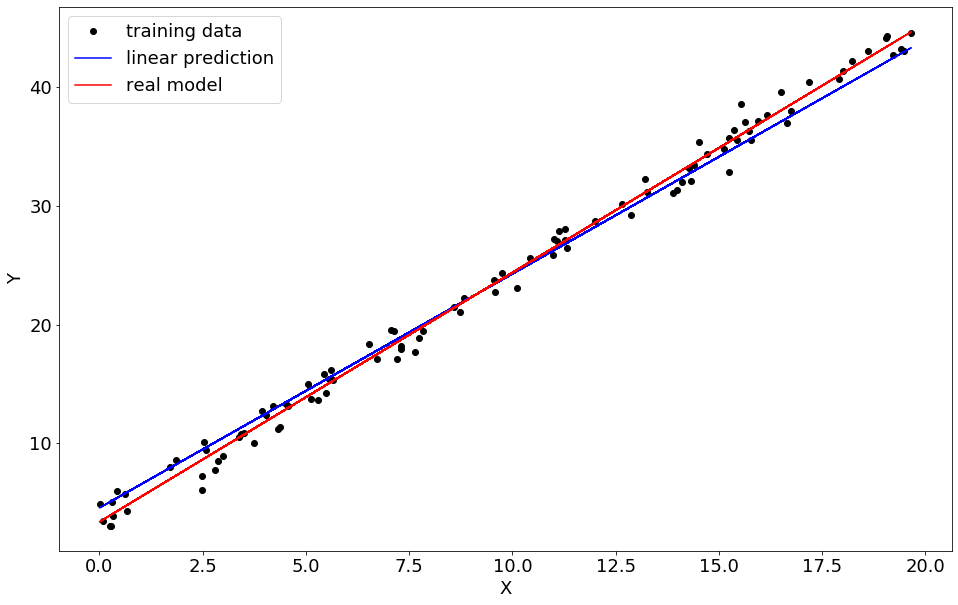

In [15]:
# do plot here
plt.figure(num=3, figsize = (16,10))
p1, = plt.plot(X, Y, 'ko')
p2, = plt.plot(X, Y3, 'b-')
p3, = plt.plot(X, Y_real, 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([p1,p2,p3], ['training data', 'linear prediction', 'real model'])

# Use lasso regression method to regress and plot

In [16]:
# first check if regularization parameter w is 0, we reproduce normal regression results
regressor4 = LinearRegression.LS_Lasso(X, Y, 0.0)
regressor4.regress()
print(regressor4.coefficient())

[2.09387835 3.42443489]


In [17]:
# now add regularization term, it should suppress beta[:-1], in our 1D data case the first coefficient
regressor4 = LinearRegression.LS_Ridge(X, Y, 1)
regressor4.regress()
Y4 = regressor4.predict(X)
print(regressor4.coefficient())

[1.97206706 4.57388843]


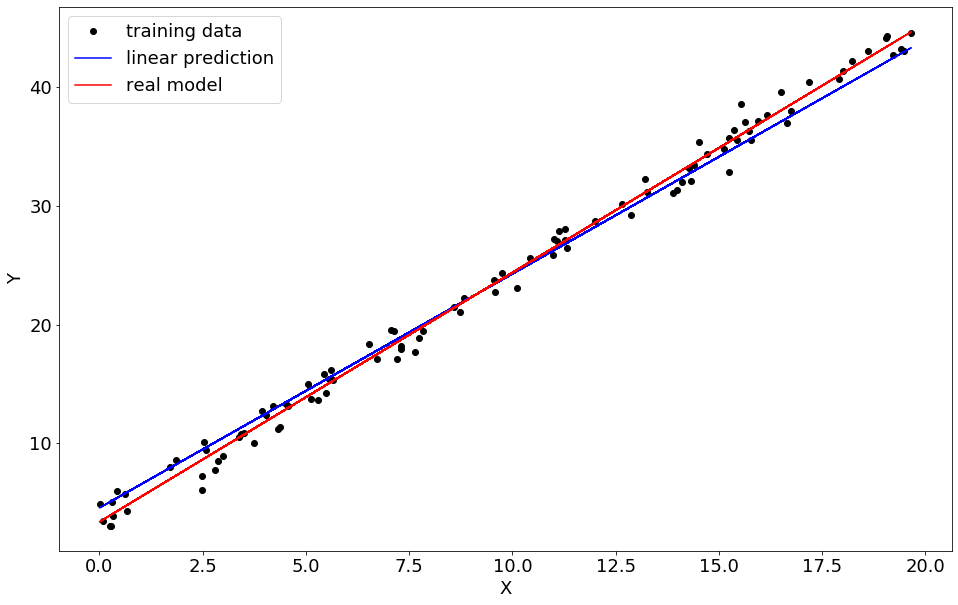

In [18]:
# do plot here
plt.figure(num=4, figsize = (16,10))
p1, = plt.plot(X, Y, 'ko')
p2, = plt.plot(X, Y4, 'b-')
p3, = plt.plot(X, Y_real, 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([p1,p2,p3], ['training data', 'linear prediction', 'real model'])

# Use LARS regression method to regress and plot

In [19]:
regressor5 = LinearRegression.LS_LARS(X, Y)
regressor5.regress()
Y5 = regressor5.predict(X)
print(regressor5.coefficient())

[2.09387835 3.42443489]


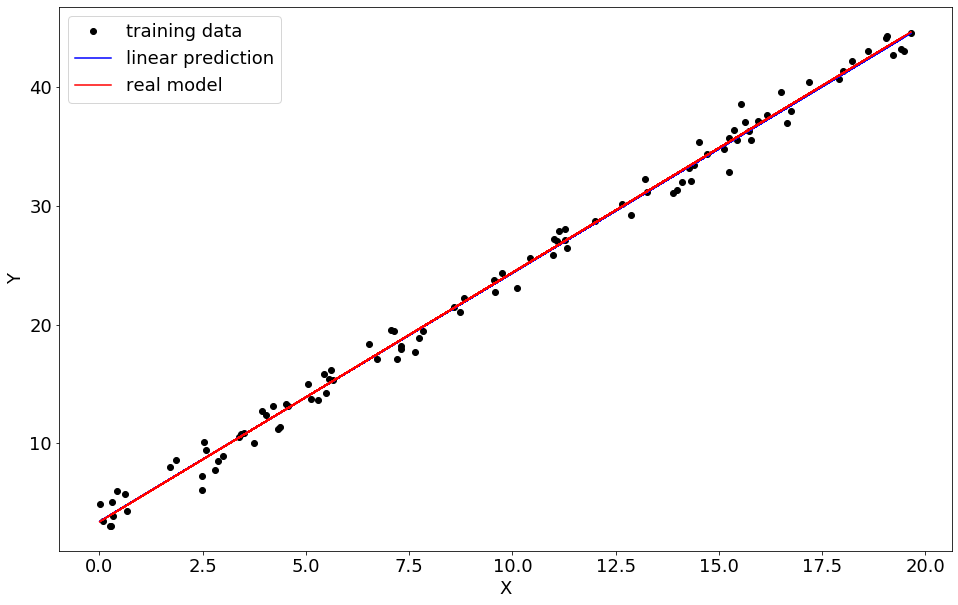

In [20]:
# do plot here
plt.figure(num=5, figsize = (16,10))
p1, = plt.plot(X, Y, 'ko')
p2, = plt.plot(X, Y5, 'b-')
p3, = plt.plot(X, Y_real, 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([p1,p2,p3], ['training data', 'linear prediction', 'real model'])